In [1]:
import pandas as pd
from functools import reduce
import datetime
import matplotlib.pyplot as plt
from helpers.candle_stick_plot import plot_candle_stick
from os import listdir
import random as rd

/Users/francoisrulliere/.local/share/virtualenvs/klondike-HZxaYKUP/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
#global varsb
data_dir_path = './data/etfs/'
sample_size = 10

In [5]:
#plot settings
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) # plot size

Populating the interactive namespace from numpy and matplotlib


In [6]:
#randam settings
rd.seed(223)

### DataFrame fetching

In [7]:
def get_etf_df(etf):
    """Get the EDF DataFrame."""
    extractd_csv = pd.read_csv(data_dir_path + etf + '.csv')
    time_index = pd.to_datetime(extractd_csv['Date'],format='%Y-%m-%d')
    df = extractd_csv.set_index(time_index)
    return df.drop('Date', axis=1)

def get_etf_list():
    """Return the list of available etfs."""
    return [f.replace('.csv', '') for f in listdir(data_dir_path)]

def first_non_na_value(serie, at):
    """Return the first value non Nan of a serie."""
    return serie.loc[serie.last(at).first_valid_index()]

### Random set of study

In [8]:
etf_list = get_etf_list()
etf_names_to_study = rd.sample(etf_list, sample_size)
etf_dfs = [get_etf_df(etf_name) for etf_name in etf_names_to_study]
etf_dfs_closing = [df["Adj Close"] for df in etf_dfs]
print(etf_names_to_study)

['LDUR', 'EWM', 'DFJ', 'SDOG', 'MOO', 'FNDX', 'RFV', 'ONEQ', 'JPGE', 'HEDJ']


In [9]:
aggregated_df = {name: df for name, df in zip(etf_names_to_study, etf_dfs_closing)}
stocks = pd.DataFrame(aggregated_df)
normalized_stocks = stocks.apply(lambda x:x/first_non_na_value(x, 'Y'))

### Plot

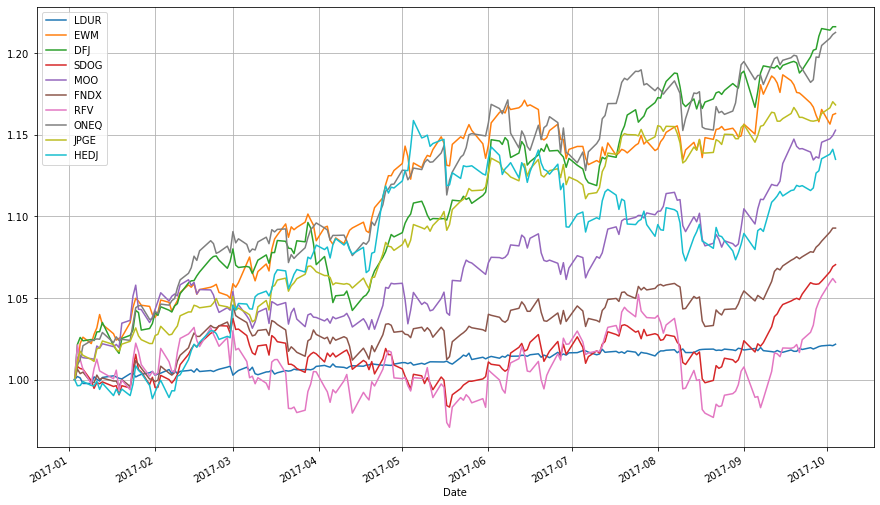

In [10]:
normalized_stocks.last('Y').plot(grid = True)

## Markovitch

In [11]:
def rentability_YoY(df):
    """Return the rentability over the last year from now of a DataFrame OR Serie."""
    return df.iloc[-1]/df.last('Y').iloc[0]

def volatility_YoY(df):
    """Return the rentability over the last year from now of a DataFrame OR Serie."""
    return df.cov()

def make_unit_vector(length):
    """Create a unit vector."""
    assert length > 0
    vector = [round(rd.random(), 3) for i in range(sample_size)]
    unit_vector = [round(i/sum(vector), 3) for i in vector]
    unit_vector[-1] = unit_vector[-1] - (sum(unit_vector) - 1)
    return unit_vector

In [12]:
def markovitch(stock_dfs, weights):
    """Return the Markovitch score for a portfolio composed with stocks normalized weigted."""
    assert stock_dfs.shape[1] == len(weights)
    assert round(sum(weights), 4) == 1
    expected_return = rentability_YoY(stock_dfs).dot(weights)
    volatility = volatility_YoY(stock_dfs).dot(weights).dot(weights)
    return expected_return, volatility
    
    

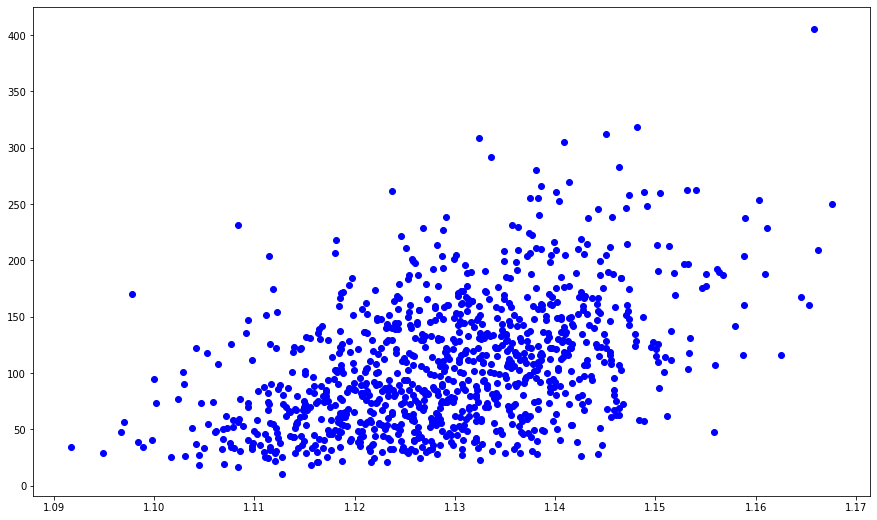

In [13]:
volatilities = []
expected_returns= []
for i in range(1000):
    weights = make_unit_vector(sample_size)
    expected_return, volatility = markovitch(stocks, weights)
    volatilities.append(volatility)
    expected_returns.append(expected_return)
plt.plot(expected_returns, volatilities, 'bo')

In [14]:
weights.dot(weights)

AttributeError: 'list' object has no attribute 'dot'